In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the images to range from 0 to 1 by dividing by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images into 1D arrays of 784 pixels
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,batch_size=32,validation_split=0.2)
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
predict=model.predict(x_test[:5])
print(predict.argmax(axis=1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8682 - loss: 0.4625 - val_accuracy: 0.9573 - val_loss: 0.1402
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9644 - loss: 0.1191 - val_accuracy: 0.9647 - val_loss: 0.1197
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9756 - loss: 0.0804 - val_accuracy: 0.9707 - val_loss: 0.0984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.1072
Test Loss: 0.0919
Test Accuracy: 0.9713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
[7 2 1 0 4]


In [ ]:
from abc import abstractclassmethod
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the images to range from 0 to 1 by dividing by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images into 1D arrays of 784 pixels
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28 ,28,1)


y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_train,y_train))
loss,accuracy=model.evaluate(x_test,y_test)
print(f"loss:{loss}")
print(f"accuracy:{accuracy}")
pred=model.predict(x_test[:5])
print(pred.argmax(axis=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8706 - loss: 0.4007 - val_accuracy: 0.9832 - val_loss: 0.0543
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9767 - loss: 0.0800 - val_accuracy: 0.9912 - val_loss: 0.0275
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9836 - loss: 0.0536 - val_accuracy: 0.9932 - val_loss: 0.0217
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9871 - loss: 0.0433 - val_accuracy: 0.9942 - val_loss: 0.0183
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0371 - val_accuracy: 0.9955 - val_loss: 0.0148
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0353
loss:0.026295922696590424
accuracy:0.9911999702453613
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
[7 2 1 0 4]


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

# Load and preprocess FER2013 dataset
data = pd.read_csv('fer2013.csv')
# Keep only rows with exactly 2304 pixels
filtered_data = data[data['pixels'].apply(lambda x: len(x.split()) == 2304)]

# Convert pixels and labels
X = np.array([np.fromstring(p, sep=' ') for p in filtered_data['pixels']]) / 255.0
y = to_categorical(filtered_data['emotion'], num_classes=7)


# Shapes for ANN and CNN
X_ann = X
X_cnn = X.reshape(-1, 48, 48, 1)

# Split data
X_ann_train, X_ann_test, X_cnn_train, X_cnn_test, y_train, y_test = train_test_split(
    X_ann, X_cnn, y, test_size=0.2, random_state=42)

# ANN Model
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(2304,)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(7, activation='softmax'))
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(7, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
ann_model.fit(X_ann_train, y_train, epochs=15, batch_size=64, validation_data=(X_ann_test, y_test))
cnn_model.fit(X_cnn_train, y_train, epochs=15, batch_size=64, validation_data=(X_cnn_test, y_test))




Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.1728 - loss: 2.6780 - val_accuracy: 0.1911 - val_loss: 1.8226
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1742 - loss: 2.0357 - val_accuracy: 0.2311 - val_loss: 1.8636
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1808 - loss: 1.9010 - val_accuracy: 0.2311 - val_loss: 1.8470
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1678 - loss: 1.8761 - val_accuracy: 0.2311 - val_loss: 1.8356
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2071 - loss: 1.8571 - val_accuracy: 0.2267 - val_loss: 1.8364
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2164 - loss: 1.8522 - val_accuracy: 0.2444 - val_loss: 1.8500
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1875 - loss: 1.8580 - val_accuracy: 0.2311 - val_loss: 1.8349
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2433 - loss: 1.8395 - val_accuracy: 0.2222 - val_loss: 1.8408


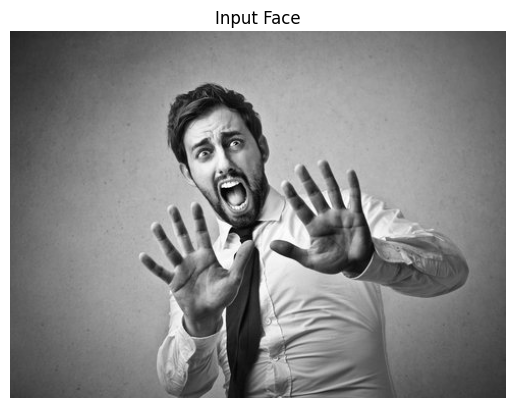

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
ANN Emotion Prediction: Happy
CNN Emotion Prediction: Fear


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess user-provided image
img = Image.open("fear.jpg").convert('L')  # Convert to grayscale

# Display the image
plt.imshow(img, cmap='gray')
plt.title("Input Face")
plt.axis('off')
plt.show()

img = img.resize((48, 48))
img_array = np.array(img) / 255.0

# Prepare for models
img_ann = img_array.reshape(1, 2304)
img_cnn = img_array.reshape(1, 48, 48, 1)


# Predict
ann_pred = ann_model.predict(img_ann)
cnn_pred = cnn_model.predict(img_cnn)

# Map predictions to emotion labels
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


print("ANN Emotion Prediction:", emotions[np.argmax(ann_pred)])
print("CNN Emotion Prediction:", emotions[np.argmax(cnn_pred)])